##Zadanie nr 1

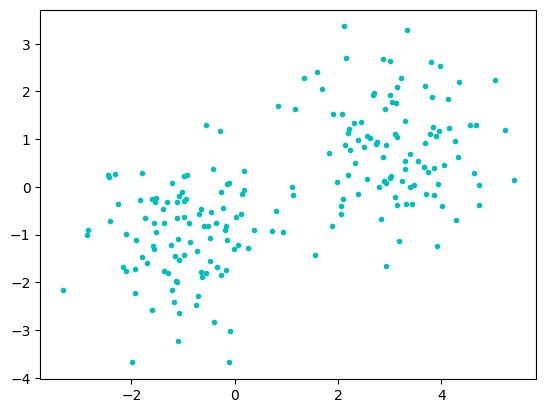

In [42]:
import numpy as np
import matplotlib.pyplot as plt
#100 punktow losowo rozmieszczone wokół punktu (-1,-1)
xx1 = np.zeros([100,2])
xx1[:,0] = np.random.normal(-1,1,100) #wspolrzedne 0 (os X)
xx1[:,1] = np.random.normal(-1,1,100) #wspolrzedne 1 (os Y)

#100 punktow losowo rozmieszczone wokół punktu (3,1)
xx2 = np.zeros([100,2])
xx2[:,0] = np.random.normal(+3,1,100)
xx2[:,1] = np.random.normal(+1,1,100)

#polaczenie punktow w jedna tablicę
x = np.concatenate( [xx1, xx2])

plt.plot(x[:, 0], x[:, 1], 'c.')
plt.show()



Wartosci wag:
[[-0.04212693 -1.25439587]
 [ 1.05792839  0.24697816]]


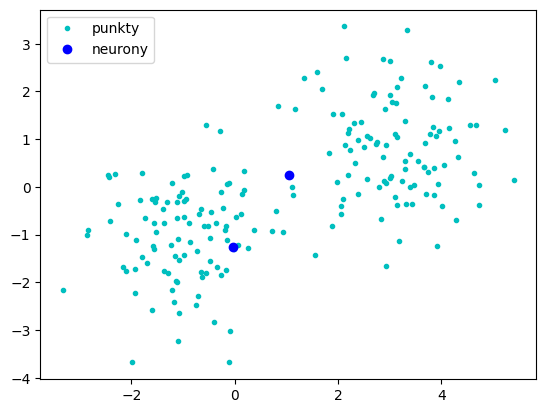

In [43]:
N = 2 #liczba neuronow
M = 2 #liczba wag (liczba współrzędnych punktów)
#dwa neurony posiadają po 2 wagi
#zapis w[0,1] oznacza drugą wagę pierwszego neuronu
#(numeracja neuronu rozpoczyna się od 0)
wagi = np.random.random([N, M])*4-2 #wagi są losowane z zakresu (-2, 2)
print("Wartosci wag:")
print( wagi)
plt.plot(x[:, 0], x[:, 1], 'c.', label="punkty")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neurony")
plt.legend()

Po uczeniu:
Wartosci wag:
[[-0.95582334 -1.06895367]
 [ 3.09481593  0.88007104]]


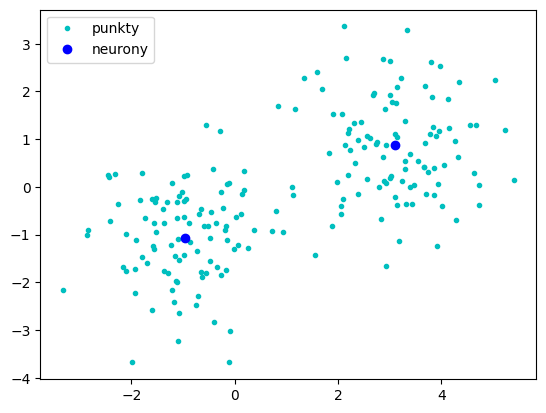

In [44]:
import math
def zwyciezca(xx):
  d = np.zeros(N)
  for i in range(N):
    for n in range(M):
        d[i] += (xx[n]-wagi[i, n])**2
    d[i] = math.sqrt( d[i] )
    #print( "Odleglosc neuronu nr",i,wagi[i],"od punktu",xx,"wynosi", d[i])
  z = np.argmin(d)
  #print("Zwycięzcą jest neuron nr",z)
  return z
#uczenie
times = 5 #liczba itracji uczenia
for times in range(times):
  for i in range(len(x)):
    xx = x[i]
    z = zwyciezca(xx)
    for j in range(M):
      wagi[z,j] = wagi[z,j] + 0.01*(xx[j]-wagi[z,j])

print("Po uczeniu:")
print("Wartosci wag:")
print( wagi)
plt.plot(x[:, 0], x[:, 1], 'c.', label="punkty")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neurony")
plt.legend()

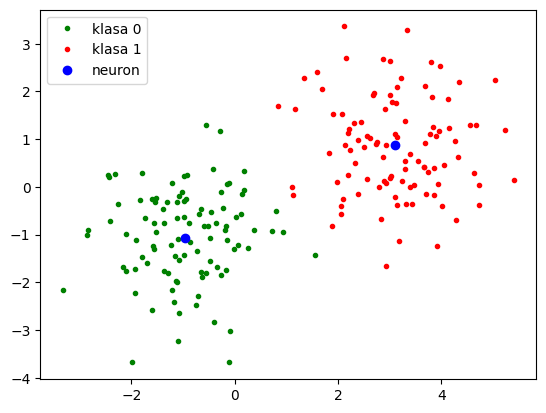

In [45]:
klasa = np.zeros(len(x))
for i in range(len(x)):
 z = zwyciezca(x[i])
 klasa[i]=z

plt.plot(x[klasa[:]==0,0], x[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(x[klasa[:]==1,0], x[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.show()

##Zadanie nr 2


Nauczono w  0  iteracji.
Po uczeniu:
Wartosci wag:
[[-0.95909845 -1.06719447]
 [ 3.10344493  0.88287405]]


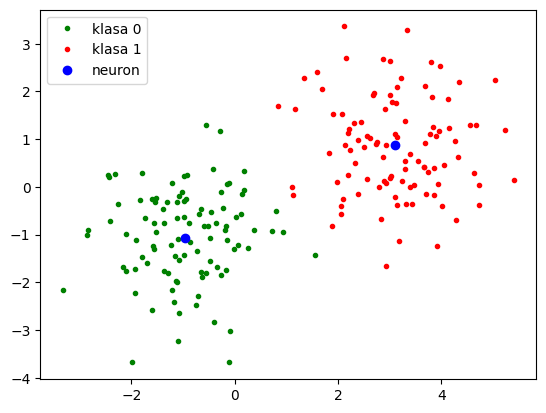

In [46]:
import copy
#Zadanie 2
#Uczenie do maks iteracji lub do braku zmiany klasy
def zwyciezca2(_xx, _wagi, ilosc_neuronow, ilosc_wspolrzednych):
  _d = np.zeros(ilosc_neuronow)
  for i in range(ilosc_neuronow):
    for n in range(ilosc_wspolrzednych):
        _d[i] += (_xx[n]-_wagi[i, n])**2
    _d[i] = math.sqrt( _d[i] )
    #print( "Odleglosc neuronu nr",i,wagi[i],"od punktu",xx,"wynosi", d[i])
  _z = np.argmin(_d)
  #print("Zwycięzcą jest neuron nr",z)
  return _z
def arrayOfClasses(_x, _wagi, ilosc_neuronow, ilosc_wspolrzednych):
  _klasa = np.zeros(len(_x))
  for i in range(len(_x)):
    _z = zwyciezca2(_x[i], _wagi, ilosc_neuronow, ilosc_wspolrzednych)
    _klasa[i]= _z
  return _klasa

def netTeach(_x, _wagi_in, _times, ilosc_neuronow, ilosc_wspolrzednych, label=""):
  print(label)
  _wagi = copy.deepcopy(_wagi_in)
  #uczenie
  _klasa = arrayOfClasses(_x, _wagi, ilosc_neuronow, ilosc_wspolrzednych)
  for t in range(_times):
    for i in range(len(_x)):
      _xx = _x[i]
      _z = zwyciezca2(_xx,_wagi,ilosc_neuronow,ilosc_wspolrzednych)
      for j in range(ilosc_wspolrzednych):
        _wagi[_z,j] = _wagi[_z,j] + 0.01*(_xx[j]-_wagi[_z,j])
    new_klasa = arrayOfClasses(_x, _wagi, ilosc_neuronow, ilosc_wspolrzednych)
    if (new_klasa == _klasa).all():
      print("Nauczono w ", t ," iteracji.")
      break
    _klasa = new_klasa
  print("Po uczeniu:")
  print("Wartosci wag:")
  print(_wagi)
  colors = ['g.', 'r.', 'y.', 'k.']
  for i in range(ilosc_neuronow):
    plt.plot(_x[_klasa[:]==i,0], _x[_klasa[:]==i,1], colors[i], label="klasa "+str(i))
  plt.plot(_wagi[:,0], _wagi[:,1], 'bo', label="neuron")
  plt.legend()
  plt.show()
  return _wagi

netTeach(x, wagi, 100, N, M);

##Zadanie nr 3


---------------
Prezentacja punktów
---------------



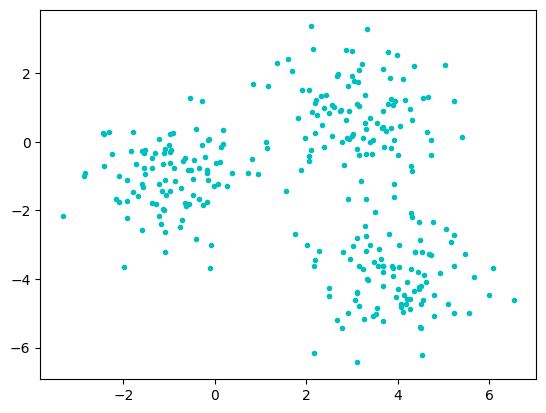

Wartosci wag: 2 neurony
[[-0.56421607 -1.91229816]
 [-0.63949065  1.09498396]]


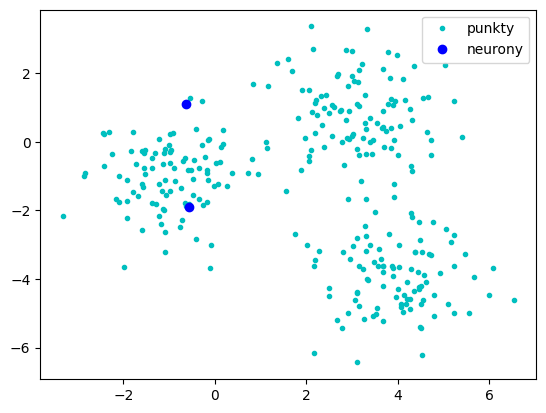

Wartosci wag: 3 neurony
[[ 1.11603125  1.51752311]
 [-0.57786369  0.68154315]
 [ 1.53217396  0.14011924]]


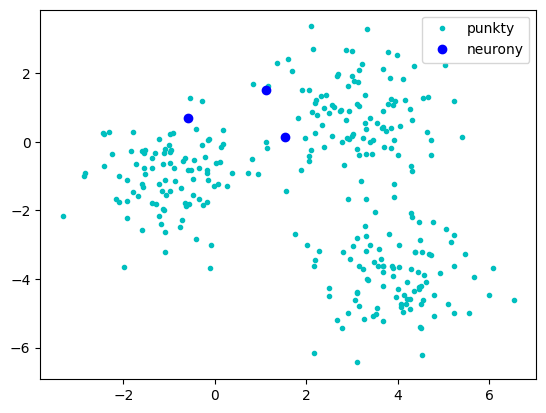

Wartosci wag: 4 neurony
[[ 1.26204431 -1.31325789]
 [-1.10296508  1.54638177]
 [ 1.38768958 -0.06767373]
 [-1.05152426 -0.05705881]]


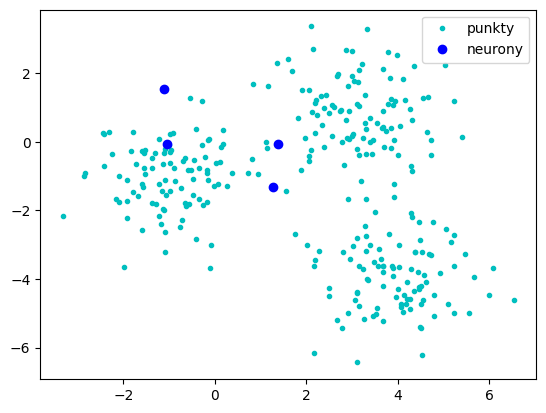


---------------
Dwa neurony
---------------

Nauczono w  6  iteracji.
Po uczeniu:
Wartosci wag:
[[-0.68982219 -0.78532298]
 [ 3.75354209 -2.67697013]]


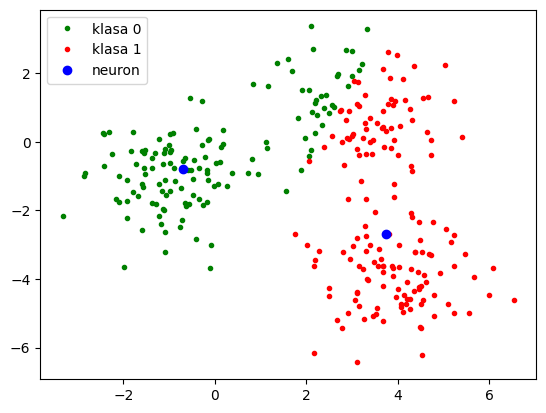


---------------
Trzy neurony
---------------

Nauczono w  4  iteracji.
Po uczeniu:
Wartosci wag:
[[ 3.08907382  0.90446545]
 [-0.95991079 -1.05402315]
 [ 3.91581977 -3.90676146]]


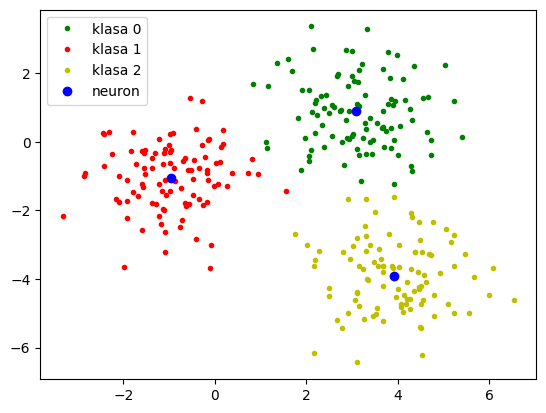


---------------
Cztery neurony
---------------

Nauczono w  6  iteracji.
Po uczeniu:
Wartosci wag:
[[ 3.92205242 -3.94106471]
 [-0.97597757  1.11944209]
 [ 3.15660509  0.8657785 ]
 [-0.94082829 -1.24703416]]


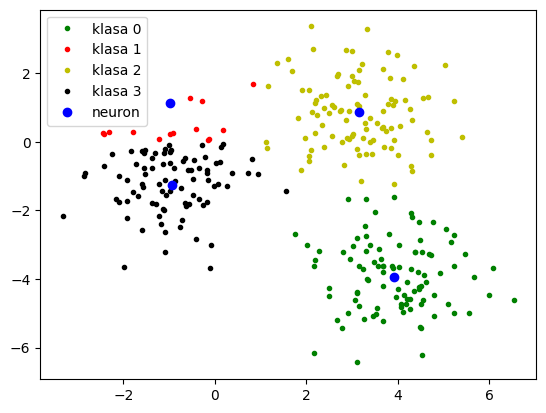

In [47]:
import numpy as np
import matplotlib.pyplot as plt

#nowa grupa punktów wokół punktu (4,-4)
xx3 = np.zeros([100,2])
xx3[:,0] = np.random.normal(4,1,100)
xx3[:,1] = np.random.normal(-4,1,100)

#polaczenie punktow w jedna tablicę
x2 = np.concatenate( [xx1, xx2, xx3])
print("\n---------------\nPrezentacja punktów\n---------------\n")
plt.plot(x2[:, 0], x2[:, 1], 'c.')
plt.show()

wagi2 = np.random.random([2, 2])*4-2 #wagi są losowane z zakresu (-2, 2)
print("Wartosci wag: 2 neurony")
print(wagi2)
plt.plot(x2[:, 0], x2[:, 1], 'c.', label="punkty")
plt.plot(wagi2[:,0], wagi2[:,1], 'bo', label="neurony")
plt.legend()
plt.show()

wagi3 = np.random.random([3, 2])*4-2 #wagi są losowane z zakresu (-2, 2)
print("Wartosci wag: 3 neurony")
print(wagi3)
plt.plot(x2[:, 0], x2[:, 1], 'c.', label="punkty")
plt.plot(wagi3[:,0], wagi3[:,1], 'bo', label="neurony")
plt.legend()
plt.show()

wagi4 = np.random.random([4, 2])*4-2 #wagi są losowane z zakresu (-2, 2)
print("Wartosci wag: 4 neurony")
print(wagi4)
plt.plot(x2[:, 0], x2[:, 1], 'c.', label="punkty")
plt.plot(wagi4[:,0], wagi4[:,1], 'bo', label="neurony")
plt.legend()
plt.show()

netTeach(x2, wagi2, 100, 2, M, "\n---------------\nDwa neurony\n---------------\n");
netTeach(x2, wagi3, 100, 3, M, "\n---------------\nTrzy neurony\n---------------\n");
netTeach(x2, wagi4, 100, 4, M, "\n---------------\nCztery neurony\n---------------\n");

Jak zauważyć można na powyższych wykresach najoptymalniejszym rozwiązaniem jest zastosowanie 3 neuronów ze względu na rozpoznawanie trzech grup punktów.
####Wniosek:
Powinniśmy stosować tyle neuronów ile grup punktów chcemy rozróżnić.